# CREDIT CARD APPROVAL

NowaDays banks receive lot of applications for credit cards . Manually analyzing these applications is tedious, error-prone and time-consuming. So, this task can be automated by using **logisitic regression** in machine learning.
***

We'll use [Credit Card Approval Dataset](https://archive.ics.uci.edu/ml/datasets/credit+approval) from the UCI Machine Learning Repository.

* First we'll load and view the dataset
* We'll see that dataset is a mixture of both continuous and categorical features and contains some missing values
* We'll need to preprocess the dataset so that the model we build can make good predictions
* After our dataset doesn't contain any missing values , we'll do exploratory data analysis to build our intuitions
* Finally , we'll build a machine learning model that can predict if an individual's application for a credit card will be accepted

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
df=pd.read_csv('../Datasets/cc_approvals.csv',header=None)
#Knowing about data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


We see that here features are not named because to protect the confidentiality of the data. [This blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) gives an overview of the probable features. The probable features in a typical credit card application are **Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and** finally the **ApprovalStatus**
. We can map these features with respect to the columns in the output.

*** 
Let us learn about the dataset a bit more to see if there are any others issues that need to be fixed

In [3]:
# Dataset statistics
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [4]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
df.tail(17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


* Our dataset contains both numeric and non-numeric values. Specifically, the features 2,7,10 and 14 contain numeric values and all other features contain non-numeric values.
* The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like mean, max, and min) about the features that have numerical values.
* Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.


Now, let's temporarily replace these missing value question marks with NaN.

In [6]:
df=df.replace('?',np.nan)

In [7]:
df[df[0].isnull()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
327,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,01160,0,-
346,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,00372,122,-
374,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,00260,1004,-
453,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,00300,0,-
479,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,00080,0,-
489,NaN,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,00263,0,-
520,NaN,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,00160,234,+
598,NaN,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,00240,768,+
601,NaN,42.25,1.750,y,p,NaN,NaN,0.000,f,f,0,t,g,00150,1,-


Now we can see that we replaced '?' with nan values. Ignoring missing values affects the perfomance of a machine learning model heavily.

We are going to fill numeric columns missing values with mean value of that column respectively

In [8]:
df=df.fillna(df.mean())

In [9]:
df.isnull().sum() # Checking number of missing values

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [10]:
df[1]

0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: 1, Length: 690, dtype: object

In [11]:
df[0].value_counts()

b    468
a    210
Name: 0, dtype: int64

The columns which are not numeric filling them with missing values won't work so we are going to fill them with the most frequent values as present in the respective columns

In [12]:
for col in df.columns:
    if df[col].dtypes=='object':
        df=df.fillna(df[col].value_counts().iloc[0])

In [13]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

Now we can see that the dataset do not contain any **missing values**
***
Now let's convert the non-numeric data into numeric data

Features like DriversLicense and ZipCode are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as feature selection.

In [14]:
df=df.drop([11,13],axis=1)

In [15]:
df[1]=df[1].map(lambda x:float(x)) #Converting into float data type as it is continuous

In [16]:
df_new=pd.get_dummies(df.drop(15,axis=1),drop_first=True)

In [17]:
df_new.head()

,1,2,7,10,14,0_a,0_b,3_l,3_u,3_y,...,6_h,6_j,6_n,6_o,6_v,6_z,8_t,9_t,12_p,12_s
0,30.83,0.000,1.25,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
1,58.67,4.460,3.04,6,560,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
2,24.50,0.500,1.50,0,824,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,27.83,1.540,3.75,5,3,0,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [18]:
sum(df[14]=='b')

0

### Splitting into train and test sets

In [19]:
X=df_new
y=df[15] # As column 15 is the label

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Now let us scale the data before we fit it into a machine learning model to the data. We will do MinMaxScaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [22]:
len(X_test)

207

Let us see the countplot of this labels

<AxesSubplot:xlabel='15', ylabel='count'>

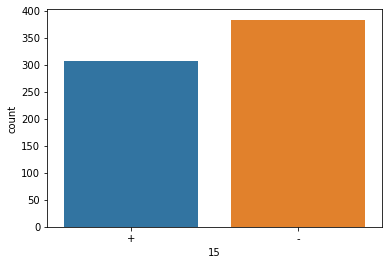

In [23]:
sns.countplot(data=df,x=df[15])

We can see that there are nearly 300 approvals and less than 400 rejections.The class labels are nearly balanced

## Fitting a logisitic regression model

In [24]:
from sklearn.linear_model import LogisticRegression
# Let us first see the perfomance of default model and then we'll perform grid search
log_model=LogisticRegression()

In [25]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

## Evaluating perfomance

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
y_pred=log_model.predict(scaled_X_test)

In [28]:
confusion_matrix(y_test,y_pred)

array([[ 75,  14],
       [ 18, 100]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           +       0.81      0.84      0.82        89
           -       0.88      0.85      0.86       118

    accuracy                           0.85       207
   macro avg       0.84      0.85      0.84       207
weighted avg       0.85      0.85      0.85       207



In [30]:
print(f'Accuracy of logistic regression classifer is:{accuracy_score(y_test,y_pred)}')

Accuracy of logistic regression classifer is:0.8454106280193237


Our model was pretty good! The accuracy was nearly 84.5% .

For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.

Let's see if we can do better. We can perform a grid search of hyperparameters to improve model's ability.


Scikit-learn's implementation of logistic regression consists of different hyperparameters but we will grid search over the following two:

* tol
* max_iter

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid={'tol':[0.01,0.001,0.0001],'max_iter':[100,200,300]}

In [32]:
grid_model=GridSearchCV(log_model,param_grid=param_grid)

In [33]:
scaled_X=scaler.fit_transform(X) #Scaling whole feature dataset

In [34]:
grid_model.fit(scaled_X,y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300],
                         'tol': [0.01, 0.001, 0.0001]})

In [35]:
print(f'GridSearch model accuracy score is:{grid_model.best_score_}')

GridSearch model accuracy score is:0.8420289855072463


In [36]:
print(f'GridSearch model best parameters are:{grid_model.best_params_}')

GridSearch model best parameters are:{'max_iter': 100, 'tol': 0.01}


While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as **scaling, label encoding, and missing value imputation.**

